In [2]:
import aplpy
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


INFO: Auto-setting vmin to -1.796e+01 [aplpy.core]
INFO: Auto-setting vmax to  5.668e+01 [aplpy.core]


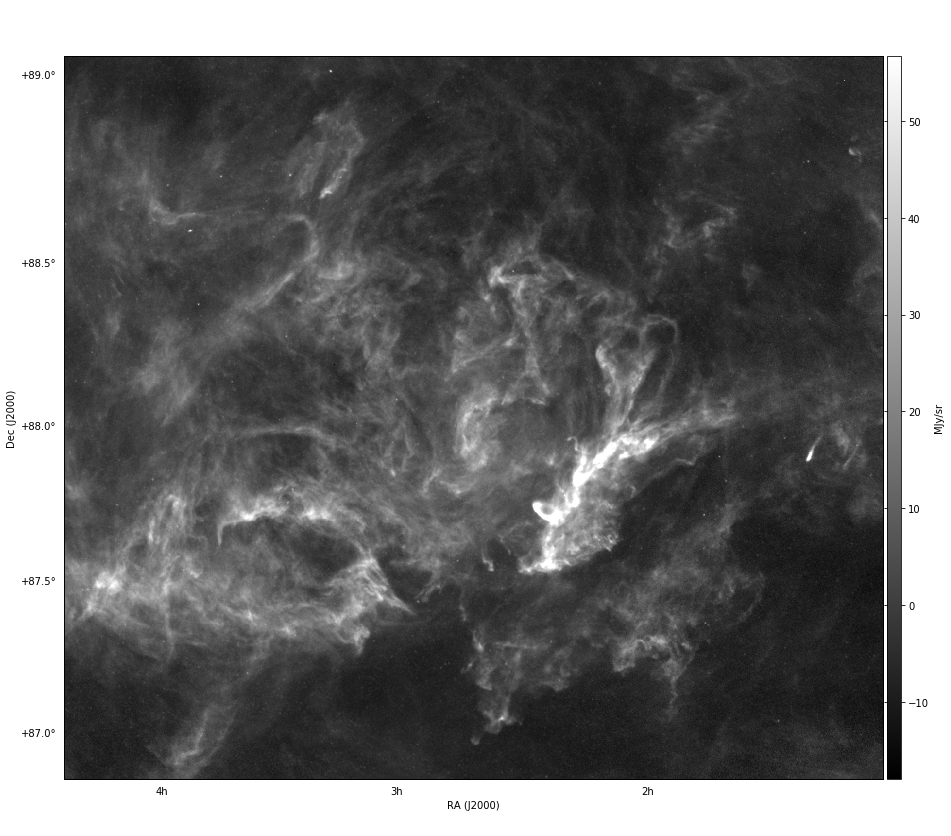

In [4]:
fig_all = plt.figure(1, figsize=(15,15))
figfile = '/Users/robitaij/postdoc/Herschel/Gould Belt/polaris-250_cut.fits'
fig = aplpy.FITSFigure(figfile,figure=fig_all)
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_xformat('hh')
fig.tick_labels.set_yformat('dd.d')
fig.ticks.set_xspacing(0.25)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
#fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')
fig.colorbar.set_axis_label_text(r'MJy/sr')

In [6]:
from powspec import powspec
from wavan import apodize, padding
from gauss_beam import gauss_beam

In [7]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

In [30]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

na = im.shape[1]
nb = im.shape[0]
imzm = im - 20.1
imzm = im - np.mean(im)

#Apodization
tapper = apodize(nb,na,0.97)
imt = imzm *tapper
imr = padding(imt,1800,1800)

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=reso)

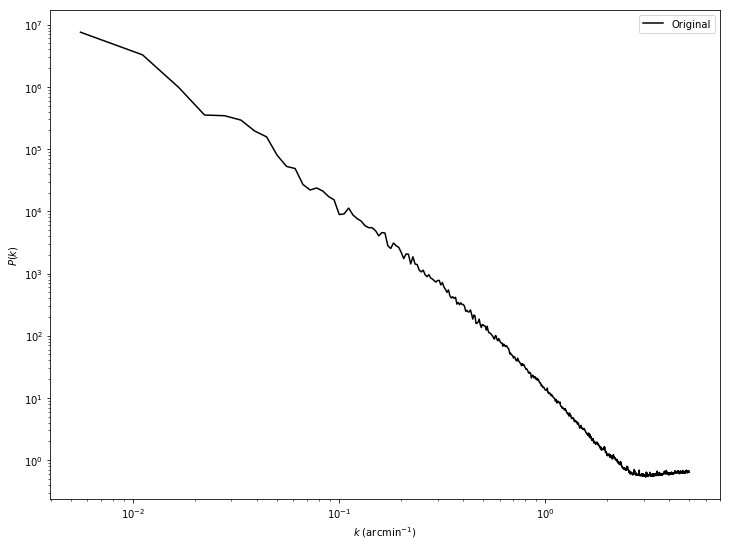

In [31]:
plt.figure(figsize=(12,9))
plt.plot(tab_k, spec_k, color='black',label='Original', linewidth=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$ (arcmin$^{-1}$)")
plt.ylabel(r"$P(k)$")
plt.legend()

In [32]:
print reso

0.10000002
